In [1]:
import json
import os
import subprocess

import numpy as np
from pathlib import Path
import yaml
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import MaxNLocator
import lossmaps as lm
import xobjects as xo

import xtrack as xt
import xcoll as xc

import lossmaps as lm

# Load

In [2]:
def retreive_lossmap_path(prefix_name, path = "/eos/home-i04/c/cmaccani/xsuite_sim/two_cryst_sim/Condor/"):

    test_list = [path + i for i in os.listdir(path) if prefix_name in i]
    for test_name in test_list:

        n_jobs = int(subprocess.check_output("find "+ test_name +" -maxdepth 1 -mindepth 1 -type d | grep Job. | wc -l", shell=True))

        part_dfs =[]

        for i in range(n_jobs):
            file_path_part = (subprocess.check_output("echo " + test_name + '/Job.' + str(i) + '/Outputdata/lossmap*', shell=True)).decode('ascii').strip()
            if os.path.exists(file_path_part):
                part_dfs.append(file_path_part)

        n_jobs_verify  = len(part_dfs)
        if n_jobs != n_jobs_verify:
            print("!!! Succesful Jobs: ", n_jobs_verify_TARGET, '/', n_jobs, ' in file: ', test_name)
    return part_dfs

In [3]:
#prefix_name = 'TEST_IR3_IR7rem_TCCS_7.2__target_absorber_20231222-1829'
#prefix_name =  'TEST_B2V_align_test_CRY5.0_15_'

In [4]:
#test_list = retreive_lossmap_path(prefix_name)

In [14]:
test_list = './Outputdata/lossmap_B2V.json'
#test_list = './Outputdata/lossmap_B2DPpos.json'
#test_list = './Outputdata/lossmap_B1DPpos.json'
#test_list = './Outputdata/lossmap_B2DPneg.json'
#test_list = './Outputdata/lossmap_B1V.json'

In [15]:
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B2V, machine=lm.Machine.LHC)
#ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.DPpos, machine=lm.Machine.LHC)
#ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.DPneg, machine=lm.Machine.LHC)
#ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1V, machine=lm.Machine.LHC)

In [16]:
#ThisLM.load_data_json(json_files=losses_json)
ThisLM.load_data_json(json_files=test_list)

Maximum inefficiency in the DS is 0.00112.


Warning, `show_layout` temporarily not supported.


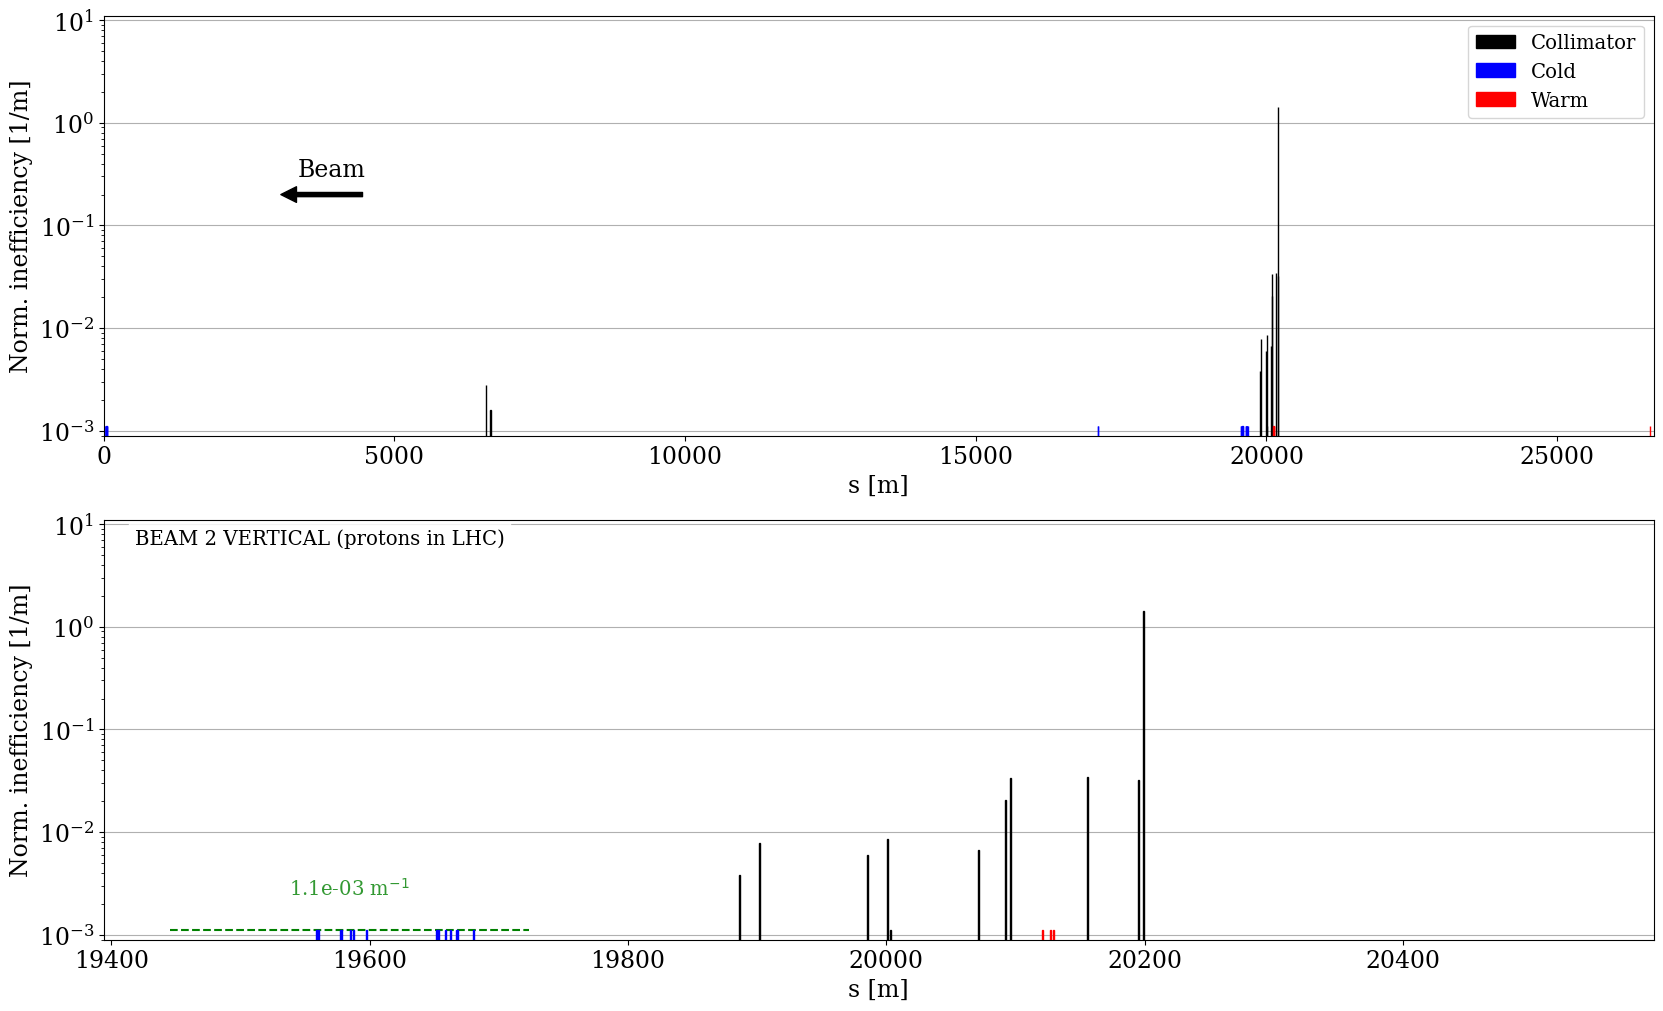

(<Figure size 2000x1200 with 2 Axes>,
 array([<Axes: xlabel='s [m]', ylabel='Norm. inefficiency [1/m]'>,
        <Axes: xlabel='s [m]', ylabel='Norm. inefficiency [1/m]'>],
       dtype=object))

In [17]:
lm.plot_lossmap(ThisLM, show_zoom=True, layout_file="../input_files/2023_Run3_flat_top/layout_flat_top_b2.tfs",  outfile = "./Outputdata/TEST.png") #, outfile = "./Outputdata/Lossmap_outputs/"+outfile_name

In [9]:
lm.plot_lossmap_interactive(ThisLM, norm='total')  #, layout="./input_files/layout_flat_top_b2.tfs"

Box(children=(Dropdown(description='norm', options=('total', 'coll_max', 'max', 'none', 'raw'), value='total')…

FigureWidget({
    'data': [{'base': 1e-17,
              'hovertemplate': 'S=%{x:.2f} m, value=%{y:1.2e}<br>%{hovertext}',
              'hovertext': array([2.]),
              'marker': {'color': 'red', 'line': {'color': 'red', 'width': 1.5}},
              'name': 'Warm',
              'type': 'bar',
              'uid': 'f0c63d50-e3ff-4d56-a0b7-937d6c255a50',
              'width': 0.8,
              'x': array([6614.85]),
              'xaxis': 'x2',
              'y': array([0.02028398]),
              'yaxis': 'y2'},
             {'base': 1e-17,
              'hovertemplate': 'S=%{x:.2f} m, value=%{y:1.2e}<br>%{hovertext}',
              'hovertext': array([7.]),
              'marker': {'color': 'blue', 'line': {'color': 'blue', 'width': 1.5}},
              'name': 'Cold',
              'type': 'bar',
              'uid': '3a60fdee-d701-4ee1-820d-0895c61a1c24',
              'width': 0.8,
              'x': array([7063.85]),
              'xaxis': 'x2',
              'y': arra

In [25]:
losses_df = ThisLM._losses
losses_df[losses_df['name']=='tcla.a5l3.b2']

#'target.4l3.b2'

#loss_tcp = int(losses_df[losses_df['name']=='tcp.d6r7.b2']['losses'])

,s,name,length,losses_type,losses_N,losses_dE
1,6574.220796,tcla.a5l3.b2,1.0,Losses.COLL,42.0,42.0


In [ ]:
idx = line.element_names.index('tcsg.4l3.b2')
for i in range(idx -15, idx+15):
    print(i)
    print(line.element_names[i], line.get_s_position()[i])
    print(line.elements[i], '\n')